# TD de Statistique n.2

**Centrale Casablanca - 16 décembre 2020**


## Exercice 1 

On suppose que la résistance à la traction d'un
fil est une variable aléatoire qui suit la loi
$\mathcal{N}(m,\sigma^2)$ et que l'on est en présence de deux
procédés de fabrication différents avec les paramètres
respectifs $m_0=100$ et $m_1=120$, $\sigma^2=100$ étant connue
dans les deux cas.
	
On dispose d'un échantillon de fils fabriqués à l'aide d'un des
procédés et on souhaite déterminer de quel procédé il
s'agit. L'échantillon dont on dispose est de taille $n=4$ et,
après calculs, la résistance moyenne à la traction sur l'échantillon est $\overline x=110$.
	
1. **Faire un test avec un risque $\alpha=0,05$ en renseignant les rubriques ci-dessous.**

_On doit tester des moyennes, donc on va faire d'un test de moyenne. Il s'agit d'un test simple puisqu'on teste deux valeurs alternative d'un paramètre. Il n'y a pas de raison de privilégier l'un ou l'autre des procédés, ce qui justifie la question 2._

$H_0:[m=m_0]\hspace{1cm}  H_1:[m=m_1]$
		
**Variable de décision $D$ :** Ici, on est dans le cas où l'échantillon est gaussien et la variance est connue, on peut donc utiliser la variable de décision
$$D=\frac{\overline X-m_0}{\sigma/\sqrt{n}}$$
qui suit une loi $\mathcal{N}(0,1)$ sous l'hypothèse $H_0$.


		
**Forme de la zone de rejet $A$ ou $W$ :** Comme $m_1>m_0$, on va rejeter $H_0$ lorsque $\overline x$ est au dessus d'un seuil $k$:

$A=[\overline X>k]$ ou encore $W=\{(x_1,...,x_n)/\ \overline x>k\}$.
		
**Zone de rejet explicite numériquement $A$ ou $W$ :**
Le seuil $k$ est calculé de sorte que $\mathbb{P}[A|H_0]=\alpha$. Or
$$\overline X>k\mbox{ si et seulement si }D>\frac{k-m_0}{\sigma/\sqrt{n}}.$$
Sous $H_0$, $D$ suit une loi $\mathcal{N}(0,1)$, donc en notant $u_{1-\alpha}$ le quantile au niveau $1-\alpha$ de cette loi, on déduit
$$k=m_0+u_{1-\alpha}\frac{\sigma}{\sqrt{n}}.$$
Numériquement :

In [2]:
import numpy as np
from scipy.stats import norm

In [3]:
n=4
m0=100
sigma=10
alpha=0.05
u=norm.ppf(1-alpha)
print(u)
k=m0+u*sigma/np.sqrt(n)
print('le seuil de rejet au risque 0.05 est k=',k)

1.6448536269514722
le seuil de rejet au risque 0.05 est k= 108.22426813475737


**Résultat du test :** comme $\overline x=110>k$, on est au delà du seuil de rejet.

**Conclusion :** On rejette donc l'hypothèse $H_0$ avec une probabilité 0.05 de se tromper.
	
**Risque de seconde espèce $\beta$ :** ce risque est la probabilité de conserver $H_0$ à tort.
C'est $\beta=\mathbb{P}[A^c|H_1]=\mathbb{P}[\overline X\leq k|m=m_1]$. Sous $H_1$,
$$\frac{\overline X-m_1}{\sigma/\sqrt{n}}$$
suit une loi $\mathcal{N}(0,1)$ et donc
$$\beta=\mathbb{P}\left[\frac{\overline X-m_1}{\sigma/\sqrt{n}}\leq \frac{k-m_1}{\sigma/\sqrt{n}}|H_1\right]=\phi\left(\frac{k-m_1}{\sigma/\sqrt{n}}\right)$$
avec $\phi$ fonction de répartion de la loi $\mathcal{N}(0,1)$.

Numériquement :

In [4]:
m1=120
beta=norm.cdf((k-m1)/(sigma/np.sqrt(n))) # cumlative density function = fonction de répartition
print('beta=',beta)

beta= 0.009257705373495408


Ce nombre est très inférieur à $\alpha$ et donc le test privilégie plutôt $H_1$.

2. **Faire un ajustement numérique sous Python pour déterminer quel devrait être l'effectif de l'échantillon pour que l'on ait $\alpha=\beta=0,01$. Quelle est alors la région de rejet ?**

_Il n'y a pas de raison de privilégier $m_0$ à $m_1$. Si on avait choisit $m_1$ au lieu de $m_0$ comme hypothèse $H_0$, on aurait imposé le risque de rejeter l'hypothèse $m=m_1$ à tort. Ce risque est aussi le risque de seconde espèce du test précédent. Il est donc naturel de chercher à équilibrer les risque de première et seconde espèce dans le test._

Pour répondre à la question, on va poser $\alpha=0.01$ et calculer $\beta$ en fonction de $n$ à $\alpha$ fixé et modifier $n$ de sorte à avoir $\beta\approx 0.01$.

On a 
$$k_n=m_0+u_{1-\alpha}\frac{\sigma}{\sqrt{n}}\mbox{ et }\beta_n=\phi\left(\frac{k_n-m_1}{\sigma/\sqrt{n}}\right).$$

Numériquement : on construit la fonction $n\to \beta$, on la teste sur des valeurs de $n$ jusqu'à obtenir $\beta\approx 0.01$.

In [5]:
alpha=0.01
u=u=norm.ppf(1-alpha)
def beta_n(n):
    k=m0+u*sigma/np.sqrt(n)
    beta=norm.cdf((k-m1)/(sigma/np.sqrt(n)))
    return beta
print(beta_n(4))
print(beta_n(5))
print(beta_n(6))

0.04709949384395185
0.01594494500056142
0.005046428673217989


Donc lorsque $n=6$, on a $\alpha =0.01$ et $\beta=0.005$ ce qui répond à peut près à la question. 

_En fait, on veut
$$1-\alpha=\phi\left(\frac{k-m_0}{\sigma/\sqrt{n}}\right)\mbox{ et }\phi\left(\frac{k-m_1}{\sigma/\sqrt{n}}\right)=\beta.$$
Ceci implique
$$\frac{k-m_1}{\sigma/\sqrt{n}}=-\frac{k-m_0}{\sigma/\sqrt{n}}$$
soit
$$k=\frac{m_0+m_1}{2}.$$
Alors 
$$1-\alpha=\phi\left(\frac{k-m_0}{\sigma/\sqrt{n}}\right)\iff \frac{\sigma}{\sqrt{n}}\phi^{-1}(1-\alpha)=k-m_0=\frac{m_1-m_0}{2}$$
d'où
$$\sqrt{n}=\frac{2\sigma\phi^{-1}(1-\alpha)}{m_1-m_0},$$
soit_

In [25]:
nn=(2*sigma*u/(m1-m0))**2
print('n doit valoir ',np.ceil(nn))

n doit valoir  6.0


## Exercice 2

On considère la réalisation d'un échantillon gaussien $\{
5,7,9,10,6,8,6,5,9,4,13 \}$. Calculer la variance empirique $s^2$ de
l'échantillon. Vérifier qu'au niveau de risque $5 \%$, on ne
peut rejeter ni l'hypothèse $\sigma^2=4$ ni l'hypothèse
$\sigma^2=20$. Pour cela, on procédera à deux tests en renseignant les rubriques ci-dessous.

In [32]:
X=np.array([5,7,9,10,6,8,6,5,9,4,13])
s2=np.var(X,ddof=1)
print("variance de l'échantillon",s2)

variance de l'échantillon 7.072727272727272


On procède à deux tests au seuil de risque $\alpha=0.05$ du type 

$H_0:[\sigma=\sigma_0]\hspace{2cm} H_1:[\sigma\neq \sigma_0]$
avec $\sigma_0^2=4$ puis $\sigma_0^2=20$.
	
**Variable de décision $D$ :** Il s'agit d'un échantillon gaussien de moyenne inconnue. On utilise comme variable de décision,
$$D=(n-1)\frac{S^2}{\sigma_0^2}$$
qui suit une loi du khi-deux à $n$-1 degrés de liberté sous l'hypothèse $H_0$.
	
**Forme de la zone de rejet $A$ ou $W$ :** Compte tene de la forme de l'hypothèse alternative, on veut rejeter $H_0$ lorsque $s^2$ est trop éloigné de $\sigma_0^2$, on choisit la zone de rejet de la forme $A=[D<k_1]\cup [D>k_2]$ et on détermine $k_1$ et $k_2$ de sorte que les deux événements soient de probabilité $\alpha/2$ sous $H_0$.
	
**Zone de rejet explicite numériquement $A$ ou $W$ :** Pour trouver $k_1$ et $k_2$, on utilise la loi de $D$ sous $H_0$ : $k_1$ et $k_2$ sont respectivement les quantiles du $\chi^2$ à $n-1$ degrés de liberté aux seuils $\alpha/2$ et $1-\alpha/2$ :

In [54]:
alpha=0.05
n=np.size(X)
from scipy.stats import chi2
k=np.array([chi2.ppf(a,n-1) for a in [alpha/2, 1-alpha/2 ]])

print('Le seuil de rejet inférieur de D est k_1=', k[0])
print('Le seuil de rejet supérieur de D est k_2=', k[1])

Le seuil de rejet inférieur de D est k_1= 3.2469727802368413
Le seuil de rejet supérieur de D est k_2= 20.483177350807388


**Résultat du test :** On calcule la valeur de la réalisation de $d$ dans les cas $\sigma_0^2=4$ et $\sigma_0^2=20$ et on trouve respectivement

In [57]:
d=np.array([(n-1)*s2/sigma2 for sigma2 in [4,20]])
print(d)

[17.68181818  3.53636364]


qui sont tous les deux hors de la zone de rejet.

**Conclusion :** On ne peut pas rejeter les hypothèses avec les donnée dont on dispose.
	
**Peut-on calculer le risque de seconde espèce $\beta$ ?** Non car on n'a pas la loi de $D$ sous $H_1$. 

## Exercice 3 : _Ajustement à loi une loi normale avec paramètres à estimer_

La répartition des durées de 670 vols Paris-Alger (en heure) en Caravelle est donnée dans le fichier `vols.txt`.
	
1. **Tracer l'histogramme sous Python.** 

In [6]:
# importation des modules et fonctions
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
# téléchargement des données
vols=pd.read_csv('vols.txt')
duree=vols.vols
n=np.size(duree)
print('n=',n)

n= 670


limites des classes
 [1.9  1.95 2.   2.05 2.1  2.15 2.2  2.25 2.3  2.35 2.4  2.45 2.5  2.55]
effectifs des classes
 [ 19.  19.  39.  48.  87.  94. 104.  92.  57.  44.  28.  26.  13.]
On a  13 classes.


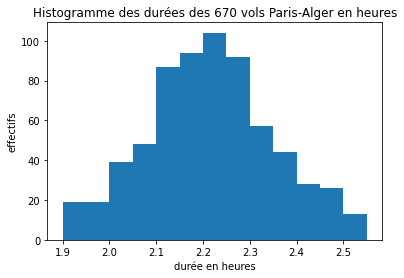

In [8]:
# création d'une figure et d'un système d'Axes puis d'un histogramme
fig, ax = plt.subplots() 
a=ax.hist(duree,bins=np.linspace(1.90,2.55,14))
plt.title('Histogramme des durées des 670 vols Paris-Alger en heures')
plt.xlabel('durée en heures')
plt.ylabel('effectifs');
print('limites des classes\n',a[1]) # les bins (limites des classes)
print('effectifs des classes\n', a[0]) # les effectifs des classes
J=np.size(a[0])
print('On a ',J,'classes.')

L'histogramme est cohérent avec un échantillon gaussien, on peut donc procéder à un test d'ajustement.

2. **Calculer l'estimation de la moyenne $\bar{x}$ et l'écart-type $s$.**

In [12]:
xb=np.mean(duree)
s=np.sqrt(np.var(duree,ddof=1))
print('moyenne ',xb,'h. et écart-type ',s, 'h.')

moyenne  2.2163664166068817 h. et écart-type  0.1378802036693807 h.


3. **On veut tester l'ajustement de ces données à une loi normale au seuil de risque 10\%.**

_(a) Ecrire $H_0$ et $H_1$._

C'est un test d'ajustement à une loi normale avec moyenne et variance estimée. 

$H_0:[X\leadsto \mathcal{N}(\;\overline x,s^2)]$ et $H_1:H_0^c$.

_(b) Donner la variable de décision $D^2$, sa loi sous $H_0$ ainsi que la zone de rejet._

Pour un ajustement, on classe les données (c'est fait par la fonction `hist`) et on utilise la variable
$$D^2=\sum_{j=1}^{J} \frac{(N_j-np_j)^2}{np_j}$$ 
qui, sous l'hypothèse $H_0$ suit une loi du khi-deux à $J-1-p$ degrés de liberté où $p$ est le nombre de paramètres estimés (ici 2). Pour tout $j$, $N_j$ est l'effectif expérimental de la classe $j$ et $p_j$ est la fréquence théorique de la classe $j$ sous $H_0$, soit $p_j=\mathbb{P}[X\in C_j]$, $C_j$ étant la classe $j$.

On rejette $H_0$ sur $[D^2>x_{1-\alpha}]$ où $x_{1-\alpha}$ est le quantile de niveau $1-\alpha$ de la loi du khi-deux à 10 degrés de liberté, soit

In [14]:
from scipy.stats import chi2
alpha=0.1
ddl=J-1-2
xr=chi2.ppf(1-alpha,ddl)
print('seuil de rejet du Khi-deux',xr)

seuil de rejet du Khi-deux 15.987179172105265


_(c) Calculer la valeur de la réalisation $d^2$ de $D^2$ et conclure._

On calcule d'abord les effectifs théoriques des classes.

In [118]:
from scipy.stats import norm
bins_th=a[1][1:-1]
f=norm.cdf(bins_th,xb,s)
p=np.zeros(J)
p[0]=f[0]
p[1:-1]=f[1:]-f[:-1]
p[-1]=1-f[-1]
d2=np.sum((a[0]-n*p)**2/(n*p))
print('réalisation d2 de D2',d2)

réalisation d2 de D2 12.53159372355203


Donc on ne rejette pas l'hypothèse gaussienne. 

_(d) Pour quels seuils de risque a-t-on la même conclusion ?_

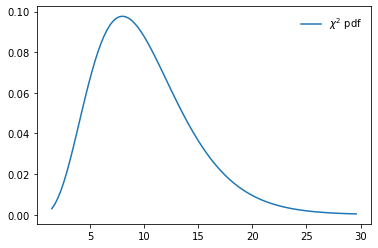

In [121]:
fig, ax = plt.subplots(1, 1)
y = np.linspace(chi2.ppf(0.001, ddl),chi2.ppf(0.999, ddl), 100)
ax.plot(y, chi2.pdf(y, ddl), label='$\chi^2$ pdf')
ax.legend(loc='best', frameon=False)
plt.show()

On aurait eu la même conclusion jusqu'au seuil de risque appelé la **$p$-value** 
$$\mathbb{P}[D^2>d^2]$$

In [122]:
pvalue=1-chi2.cdf(d2,ddl)
print(pvalue)

0.25105200668126426


## Exercice 4 

Le contrôle effectué sur deux lots de bobines
	électriques en provenance de deux fournisseurs différents donne
	le résultat suivant.

* Fournisseur 1: bobines livrées $1200$, nombre de pièces défectueuses 42; 
* Fournisseur 2: bobines livrées $1500$, nombre de pièces défectueuses 30.

On veut savoir s'il y a une différence significative de la
	qualité de fabrication entre les deux fournisseurs avec un risque
	de première espèce $\alpha=0,05$.
	

1. **On suppose que les données des fournisseurs sont des réalisations d'échantillons indépendants de v.a. $X^i$ suivant des lois de Bernoulli de paramètres $p_i$, pour $i=1,2$. Proposer des lois approchant celles de $\overline{X^1}$ et $\overline{X^2}$.**

Comme les échantillons sont grands $\overline{X^1}$ et $\overline{X^2}$ suivent approximativement, d'après le théorème limite central, des lois normales indépendantes de paramètres respectifs $p_i$ et $p_i(1-p_i)/n_i$ pour $i=1$, $2$, avec $n_i$ la taille de l'échantillon $i$.

2. **Proposer une loi approchant celle de $\overline{X^1}-\overline{X^2}$ si $p_1=p_2=p$.**

Comme les variables $\overline{X^1}$ et $\overline{X^2}$ sont indépendantes, leur différence est encore approximativement une loi normale et sous l'hypothèse $p_1=p_2=p$, sa moyenne est nulle et sa variance est 
$$\sigma^2=p(1-p)\left(\frac{1}{n_1}+\frac{1}{n_2}\right).$$

3. **Réaliser un test au seuil de risque $\alpha$ de l'égalité des moyennes.**
		
_Indication : on pourra estimer la valeur commune de $p_1$ et $p_2$ sous l'hypothèse $p_1=p_2$ par $$\hat p=\frac{n_1\overline{X^1}+n_2\overline{X^2}}{n_1+n_2}$$
en justifiant ce choix._

$H_0:[p_1=p_2]$ et $H_1:[p_1\neq p_2]$

La variable $\overline{X^1}-\overline{X^2}$ suit, sous $H_0$, une loi normale de paramètres 0 et $\sigma^2$ qu'il faut estimer par $\hat \sigma^2$. Le paramètre $p$ à estimer est le paramètre commun aux deux échantillons pris ensemble. On peut donc l'estimer par l'estimateur sur l'échantillon total :
$$\hat p=\frac{n_1\overline{X^1}+n_2\overline{X^2}}{n_1+n_2}$$

On choisit alors comme variable de décision, la variable
$$D= \frac{\overline X^1-\overline X^2}{\hat\sigma}\mbox{ avec }\hat\sigma^2=\hat p (1-\hat p )\left(\frac{1}{n_1}+\frac{1}{n_2}\right)$$
qui suit, sous $H_0$, approximativement une loi $\mathcal{N}(0,1)$. On choisit la région de rejet de la forme $[|D|>k]$ avec $k=u_{1-\alpha/2}$.


In [128]:
alpha=0.05
u=norm.ppf(1-alpha/2)
n1=1200
n2=1500
x1=42
x2=30
p=(x1+x2)/(n1+n2)
print('estimation de p:',p)
sigma=np.sqrt(p*(1-p)*(1/n1+1/n2))
d=(x1/n1-x2/n2)/sigma
print('seuil de rejet bilatéral:', u)
print('réalisation de la variable de décision:',d)

estimation de p: 0.02666666666666667
seuil de rejet bilatéral: 1.959963984540054
réalisation de la variable de décision: 2.403977867835122


On rejette donc l'hypothèse $H_0$ selon laquelle les échantillons sont similaire au seuil de risque $0.05$.